In [1]:
# Libraries
import pandas as pd
import numpy as np

# Wrangling
import acquire
import prepare

# Exploration/Visualizing
import matplotlib.pyplot as plt
import seaborn as sns
import explore
from IPython.core import display as ICD

# Custom Modules
import util
from env import get_db_url

# Custom notebook settings for max rows and columns
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', None)

In [2]:
df = acquire.get_log_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  900223 non-null  int64  
 1   date        900223 non-null  object 
 2   time        900223 non-null  object 
 3   path        900222 non-null  object 
 4   user_id     900223 non-null  int64  
 5   cohort_id   847330 non-null  float64
 6   ip          900223 non-null  object 
 7   id          847330 non-null  float64
 8   name        847330 non-null  object 
 9   slack       847330 non-null  object 
 10  start_date  847330 non-null  object 
 11  end_date    847330 non-null  object 
 12  created_at  847330 non-null  object 
 13  updated_at  847330 non-null  object 
 14  deleted_at  0 non-null       float64
 15  program_id  847330 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 109.9+ MB


In [4]:
df.head()

,Unnamed: 0,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0


In [5]:
util.metrics(df)

There are 900223 rows and 16 columns in this dataframe.
Plus the following nulls:
Unnamed: 0         0
date               0
time               0
path               1
user_id            0
cohort_id      52893
ip                 0
id             52893
name           52893
slack          52893
start_date     52893
end_date       52893
created_at     52893
updated_at     52893
deleted_at    900223
program_id     52893
dtype: int64
Unnamed: 0      int64
date           object
time           object
path           object
user_id         int64
cohort_id     float64
ip             object
id            float64
name           object
slack          object
start_date     object
end_date       object
created_at     object
updated_at     object
deleted_at    float64
program_id    float64
dtype: object


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,900223.0,450111.000000,259872.140027,0.0,225055.5,450111.0,675166.5,900222.0
user_id,900223.0,458.825707,249.296767,1.0,269.0,475.0,660.0,981.0
cohort_id,847330.0,48.501049,32.795482,1.0,28.0,33.0,57.0,139.0
id,847330.0,48.501049,32.795482,1.0,28.0,33.0,57.0,139.0
deleted_at,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program_id,847330.0,2.086004,0.388231,1.0,2.0,2.0,2.0,4.0


In [6]:
counts = util.get_numbers(df)

Unnamed: 0
0         1
600153    1
600142    1
600143    1
600144    1
         ..
300078    1
300079    1
300080    1
300081    1
900222    1
Name: Unnamed: 0, Length: 900223, dtype: int64
-----------------
date
2021-03-19    3104
2021-04-12    2446
2021-03-25    2369
2020-09-08    2304
2021-03-16    2298
2020-07-27    2275
2021-02-02    2257
2021-04-05    2236
2021-03-29    2230
2020-07-16    2196
2021-04-15    2192
2021-04-06    2184
2021-03-23    2171
2021-04-19    2156
2020-04-20    2144
2020-09-28    2133
2020-08-03    2117
2021-01-11    2046
2020-10-26    2039
2020-07-28    2031
2020-06-01    1992
2021-03-22    1977
2020-10-22    1976
2021-03-18    1975
2020-09-21    1966
2020-08-10    1944
2020-06-16    1939
2021-04-20    1930
2020-11-02    1919
2020-09-11    1917
2020-12-08    1893
2019-10-07    1879
2021-04-01    1874
2021-01-19    1874
2020-07-24    1852
2020-07-20    1848
2021-03-08    1846
2020-08-06    1843
2021-01-26    1838
2020-11-30    1835
2020-12-14    1825
2021-02-

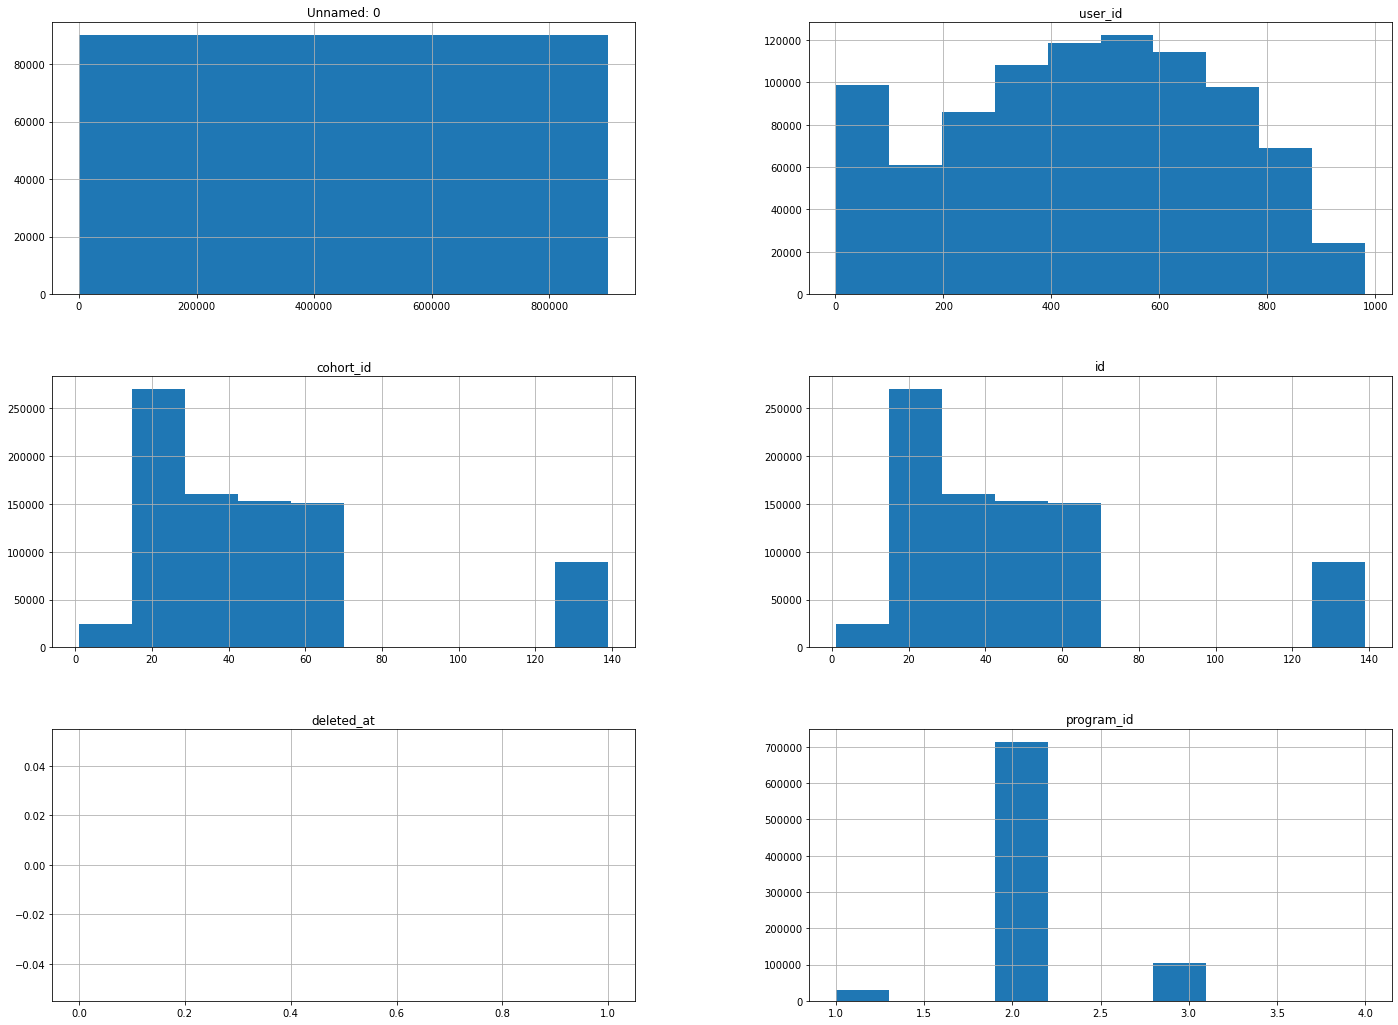

In [7]:
# Shows histograms for numerical columns in df
df.hist(figsize=(24, 18))
plt.show()

In [8]:
ds_names = ['Ada', 'Bayes', 'Curie', 'Darden', 'Easley', 'Florence', '']

In [9]:
ds_alumni = df.loc[df['name'].isin(ds_names)]

In [10]:
ds_alumni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103412 entries, 326053 to 900202
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  103412 non-null  int64  
 1   date        103412 non-null  object 
 2   time        103412 non-null  object 
 3   path        103411 non-null  object 
 4   user_id     103412 non-null  int64  
 5   cohort_id   103412 non-null  float64
 6   ip          103412 non-null  object 
 7   id          103412 non-null  float64
 8   name        103412 non-null  object 
 9   slack       103412 non-null  object 
 10  start_date  103412 non-null  object 
 11  end_date    103412 non-null  object 
 12  created_at  103412 non-null  object 
 13  updated_at  103412 non-null  object 
 14  deleted_at  0 non-null       float64
 15  program_id  103412 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 13.4+ MB


In [11]:
# convert date, time, start_date, end_date, created_at, and	updated_at, to datetime dtype
# convert all ids to objects since they're used as ids not computational numbers
# drop 'cohort_id' or 'id' since they're the same
# drop 'slack', since 'name' has basically the same info plus more
# drop deleted_at since it's nulls
# can set a multi-index using 'date' and 'time' as the timestamp
# figure out how to sus out the ds students from the 52893 entries with some column nulls
# at least 103412 ds cohort entries
# 1 value in path is a null

# Preparation
- 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [12]:
q2_df = prepare.prepare_logs()

In [13]:
q2_df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
0,/,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,97.105.19.61,teddy,2018-01-08 00:00:00,2018-05-17 00:00:00,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24


In [14]:
q2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   path        900222 non-null  object 
 1   user_id     900223 non-null  int64  
 2   cohort_id   847330 non-null  float64
 3   ip          900223 non-null  object 
 4   name        847330 non-null  object 
 5   start_date  847330 non-null  object 
 6   end_date    847330 non-null  object 
 7   created_at  847330 non-null  object 
 8   updated_at  847330 non-null  object 
 9   program_id  847330 non-null  object 
 10  date_time   900223 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 75.5+ MB


In [15]:
q2_df['path'].unique()

array(['/', 'java-ii', 'java-ii/object-oriented-programming', ...,
       'florence-python-assessment.html', 'javascript-i/dom',
       'appendix/professional-development/post-interview-review-form'],
      dtype=object)

In [16]:
q2_df = prepare.q2_df_prep(q2_df)

AttributeError: 'DataFrame' object has no attribute 'date'

In [ ]:
q2_df.head()

# Exploration
- 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [ ]:
q2_df['cohorts'].value_counts()

Based on the question should I scale my data to try to equally represent each cohort?

Should I scale it based on the length of their program?

Should it be scaled based on number of students per cohort?

Should I exclude lessons accessed outside of each cohorts class dates?

Should I exclude cohorts that didn't finish their program before the last recorded date?

If so, how do I deal with cohorts with less than 100 entries? Are they considered anomalies as well?

In [ ]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('probability'),
        left_index=True,
        right_index=True,
    )

In [ ]:
ip_df = value_counts_and_frequencies(q2_df.ip)
ip_df.head()

In [ ]:
ip_df['count'].sort_values().tail(5).plot.barh(figsize=(5, 9))

IP Address: 97.105.19.61
ASN: 11427
City: San Antonio
State/Region: Texas
Country: US
Postal Code: 78205
ISP: Codeup LLC
Time Zone: -05:00

IP Address: 97.105.19.58
ASN: 11427
City: San Antonio
State/Region: Texas
Country: US
Postal Code: 78205
ISP: Codeup LLC
Time Zone: -05:00

IP Address: 192.171.117.210
ASN: 16887
City: San Antonio
State/Region: Texas
Country: US
Postal Code: 78216
ISP: Aethernet LLC
Time Zone: -05:00

In [ ]:
paths = q2_df['path'].value_counts()
paths

In [ ]:
paths_df = paths.to_frame()

In [ ]:
paths_df

In [ ]:
q2_df

In [ ]:
# convert columns with dates to datetime
dates = ['start_date', 'end_date', 'created_at', 'updated_at']
for col in dates:
    q2_df[col] = pd.to_datetime(df[col])

In [ ]:
q2_df = q2_df[q2_df['end_date'] <= q2_df['created_at']]

In [ ]:
q2_df.info()

In [ ]:
cohort = ['ceres', 'zion', 'jupiter', 'voyageurs', 'ganymede', 'apex', 'deimos', 'darden',
        'teddy', 'hyperion', 'betelgeuse', 'ulysses', 'europa', 'xanadu', 'bayes', 'wrangell',
        'andromeda', 'kalypso', 'curie', 'yosemite', 'bash', 'luna', 'marco', 'easley', 'lassen',
        'arches', 'florence', 'sequoia', 'neptune', 'olympic', 'kings', 'pinnacles', 'hampton',
        'oberon', 'quincy', 'niagara', 'mammoth', 'glacier', 'joshua', 'ike', 'badlands', 
        'franklin', 'apollo', 'denali', 'everglades']

In [ ]:
def split_cohorts(df):
    cohort = ['ceres', 'zion', 'jupiter', 'voyageurs', 'ganymede', 'apex', 'deimos', 'darden',
        'teddy', 'hyperion', 'betelgeuse', 'ulysses', 'europa', 'xanadu', 'bayes', 'wrangell',
        'andromeda', 'kalypso', 'curie', 'yosemite', 'bash', 'luna', 'marco', 'easley', 'lassen',
        'arches', 'florence', 'sequoia', 'neptune', 'olympic', 'kings', 'pinnacles', 'hampton',
        'oberon', 'quincy', 'niagara', 'mammoth', 'glacier', 'joshua', 'ike', 'badlands', 
        'franklin', 'apollo', 'denali', 'everglades']
    for name in cohort:
        df[df['cohorts']==name]
    return df

In [ ]:
dfs = {cohorts:grp.drop('cohorts', axis=1) 
       for cohorts, grp in q2_df.reset_index().groupby('cohorts')}

for cohorts, grp in dfs.items():
    print('\033[1m' + cohorts.upper() + '\033[0m')
    ICD.display(grp)

In [ ]:
split_cohorts(q2_df)

Divied by programs

In [ ]:
q2_df['cohorts'].value_counts()

In [ ]:
cohort_lessons = pd.crosstab(q2_df.cohorts, q2_df.path)
cohort_lessons

In [ ]:
cohort_lessons.hist()
plt.show()

In [ ]:
ceres = q2_df[q2_df['cohorts']=='ceres']
ceres

In [ ]:
zion = q2_df[q2_df['cohorts']=='zion']
zion

In [ ]:
jupiter = q2_df[q2_df['cohorts']=='jupiter']
jupiter

In [ ]:
fortuna = q2_df[q2_df['cohorts']=='fortuna']
fortuna

In [ ]:
voyageurs = q2_df[q2_df['cohorts']=='voyageurs']
voyageurs

In [ ]:
ganymede = q2_df[q2_df['cohorts']=='ganymede']
ganymede

In [ ]:
deimos = q2_df[q2_df['cohorts']=='deimos']
deimos

In [ ]:
darden = q2_df[q2_df['cohorts']=='darden']
darden

In [ ]:
teddy = q2_df[q2_df['cohorts']=='teddy']
teddy

In [ ]:
hyperion = q2_df[q2_df['cohorts']=='hyperion']
hyperion

In [ ]:
betelgeuse = q2_df[q2_df['cohorts']=='betelgeuse']
betelgeuse

In [ ]:
ulysses = q2_df[q2_df['cohorts']=='ulysses']
ulysses

In [ ]:
europa = q2_df[q2_df['cohorts']=='europa']
europa

In [ ]:
xanadu = q2_df[q2_df['cohorts']=='xanadu']
xanadu

In [ ]:
bayes = q2_df[q2_df['cohorts']=='bayes']
bayes

In [ ]:
wrangell = q2_df[q2_df['cohorts']=='wrangell']
wrangell

In [ ]:
andromeda = q2_df[q2_df['cohorts']=='andromeda']
andromeda

In [ ]:
kalypso = q2_df[q2_df['cohorts']=='kalypso']
kalypso

In [ ]:
curie = q2_df[q2_df['cohorts']=='curie']
curie

In [ ]:
yosemite = q2_df[q2_df['cohorts']=='yosemite']
yosemite

In [ ]:
bash = q2_df[q2_df['cohorts']=='bash']
bash

In [ ]:
luna = q2_df[q2_df['cohorts']=='luna']
luna

In [ ]:
marco = q2_df[q2_df['cohorts']=='marco']
marco

In [ ]:
easley = q2_df[q2_df['cohorts']=='easley']
easley

In [ ]:
lassen = q2_df[q2_df['cohorts']=='lassen']
lassen

In [ ]:
arches = q2_df[q2_df['cohorts']=='arches']
arches

In [ ]:
florence = q2_df[q2_df['cohorts']=='florence']
florence

In [ ]:
sequoia = q2_df[q2_df['cohorts']=='sequoia']
sequoia

In [ ]:
neptune = q2_df[q2_df['cohorts']=='neptune']
neptune

In [ ]:
olympic = q2_df[q2_df['cohorts']=='olympic']
olympic

In [ ]:
kings = q2_df[q2_df['cohorts']=='kings']
kings

In [ ]:
pinnacles = q2_df[q2_df['cohorts']=='pinnacles']
pinnacles

In [ ]:
hampton = q2_df[q2_df['cohorts']=='hampton']
hampton

In [ ]:
oberon = q2_df[q2_df['cohorts']=='oberon']
oberon

In [ ]:
quincy = q2_df[q2_df['cohorts']=='quincy']
quincy

In [ ]:
niagara = q2_df[q2_df['cohorts']=='niagara']
niagara

In [ ]:
mammoth = q2_df[q2_df['cohorts']=='mammoth']
mammoth

In [ ]:
glacier = q2_df[q2_df['cohorts']=='glacier']
glacier

In [ ]:
joshua = q2_df[q2_df['cohorts']=='joshua']
joshua

In [ ]:
ike = q2_df[q2_df['cohorts']=='ike']
ike

In [ ]:
badlands = q2_df[q2_df['cohorts']=='badlands']
badlands

In [ ]:
franklin = q2_df[q2_df['cohorts']=='franklin']
franklin

In [ ]:
apollo = q2_df[q2_df['cohorts']=='apollo']
apollo

In [ ]:
denali = q2_df[q2_df['cohorts']=='denali']
denali

In [ ]:
everglades = q2_df[q2_df['cohorts']=='everglades']
everglades

In [ ]:
q2_df

In [ ]:
ceres.info()

In [ ]:
lessons = q2_df[q2_df['path']==(q2_df['path'].unique)]

In [ ]:
lessons

Troubleshoot

In [ ]:
# figure out how to return the name of the argument as the name in the print statement
def row_count(df):
    rows = df.shape[0]
    return print(f'There are {rows} rows in the {df.name} dataframe.')

In [ ]:
row_count(q2_fsp)

In [ ]:
fsj_row_count = row_count(q2_fsj)
fsj_row_count

In [ ]:
# creates a new column called 'split_path' thad divides 'path' into separate
# elements by the '/' delimiter
q2_ds['split_path'] = q2_ds['path'].str.split('/')
q2_ds

In [ ]:
# assigns variable to sorted values in descending order for web_design series
q2_fsj_web_design_groupby_sorted = q2_fsj_web_design_groupby.sort_values(ascending=False)

In [ ]:
q2_fsj_web_design_groupby_sorted

In [ ]:
# percentage of the 2nd highest value compared to the highest using presorted variable
q2_fsj_web_design_groupby_sorted[1]/q2_fsj_web_design_groupby_sorted[0]

In [ ]:
# percentage of the 2nd highest value compared to the highest
q2_ds_fundamentals_groupby.sort_values(ascending=False)[1]/q2_ds_fundamentals_groupby.sort_values(ascending=False)[0]

In [ ]:
q2_ds_combined_lessons = pd.concat(q2_ds_lesson_dfs_groupby, axis=1)
q2_ds_combined_lessons

In [ ]:
q2_ds_combined_lessons.max()

In [ ]:
q2_fsj_combined_lessons = pd.concat(q2_fsj_lesson_dfs_groupby, axis=1)
q2_fsj_combined_lessons

In [ ]:
q2_fsj_combined_lessons.T

In [ ]:
q2_fsj_combined_lessons.max()